### 2. Implementar e testar em Jupyter um simulador de um pêndulo e de um aeropêndulo 

Animação de um pêndulo com anotação dinâmica das forças (da wikipedia):

![Pendulo e forças](https://upload.wikimedia.org/wikipedia/commons/f/fa/PenduloTmg.gif)

Animação de um pêndulo com anotação dinâmica de velocidade e aceleração vetorial (da wikipedia):

![Pendulo e forças](https://upload.wikimedia.org/wikipedia/commons/2/24/Oscillating_pendulum.gif)

Observações: 
- referencial cartesiano de laboratório xy é útil para criar visualização, mas para análise deve considerar-se o referencial local de coordenadas $\theta$ ('azimutal', i.e.angular, tangencial) e $r$ ('radial'). 
- o vetor de velocidade só tem componente azimutal
- o vetor de aceleração tem componente tangencial e radial. Na análise só consideramos a componente azimutal, que a parte radial é sempre compensada pelo 'braço' do pêndulo.

Exercício: Esboçar o andamento com o tempo de ângulo $\Theta(t)$, velocidade angular $\omega(t)=\dot \theta(t)$ e velocidade azimutal e linear $v(t)=\omega(t) \cdot l$, e a aceleração $\alpha(t)=\dot \omega(t)$. 

## Simulação de pêndulo e aeropêndulo sem realimentação (feedback)

Em geral, a dinâmica de um corpo rígido em rotação numa dimensão (um eixo) é descrita através de:
$$J \frac{d^2\Theta}{dt^2}=\sum_{i=1}^{n} \tau_i $$
em que:
- $\Theta$ é o ângulo, e $\omega=\frac{d\Theta}{dt}$ e $\alpha=\frac{d^2\Theta}{dt^2}$ velocidade e aceleração ângular
- $J$ é o momentum de inêrcia a calcular pela distribuição da massa em relação ao eixo rotativo.
- $\tau_i$ são os torques/binários parciais, e que são somados. 

A equação differential para o aeropêndulo é:
$$m l^2 \frac{d^2\Theta}{dt^2} = -m g l sin(\Theta)- b \frac{d\Theta}{dt}+l H(t) $$
em que $t$ é o tempo, $\Theta$ é o ângulo do pêndulo em relação à vertical, $\omega=\dot{\Theta}=\frac{d\Theta}{dt}$ e $\alpha=\dot{\omega}=\frac{d^2\Theta}{dt^2}$ são a velocidade e aceleração ângular, $H(t)$ é a força de propulsão da hélice. Os parâmetros do sistema são: a massa $m$,, o comprimento $l$ do pêndulo, e o coeficiente de atrito $b$. Os parâmetros são determinados através de medidas diretas (medir peso, medir comprimento, etc.) ou indiretas, por exemplo ajustando um modelo teórico ao comportamento do sistema em condições reais, i.e. como responde a certos inputs. Finalmente, $g=9.81 m/s^2$ é o coeficiente gravítico.

As equações diferenciais descrevem a dinâmica do sistema, i.e. como responde à alterações do sinal de entrada (propulsão do hélice), ou alterações do meio ambiente (temperatura, movimento de ar, etc.) ou alterações dos parámetros do sistema (comprimento do braço, atrito no eixo, etc.). 

É instrutivo analisar primeiro, como referências iniciais:
- a solução dinâmica mais simples, isto é linearizada, sem atrito e sem força de propulsão
- a solução estacionária mais simples, com força de propulsão constante e as derivadas nulas

### Solução dinâmica linearizada sem atrito e sem força de propulsão
A solução analítica de referência mais simples é a equação linearizada ($sin(\Theta)\approx \Theta$) e sem atrito ($b=0$) e com força de propulsão nula ($H=0$). 
$$\frac{d^2\Theta}{dt^2} = - \frac{g}{l} \Theta $$

Resulta num movimento harmônico sinusoidal com amplitude constante:
$$\Theta(t)=\Theta_0 sin(2 \pi \frac{t}{T}+\phi_0)$$
em que $\Theta_0$ e $\phi_0$ dependem das condições iniciais.

Nesse pêndulo matemátio idealizado, o período (característico) de oscilação não depende da massa $m$ nem da distribuição da massa, nem da amplitude do movimento. Depende só do comprimento do pêndulo:
 $$T=2 \pi \sqrt{\frac{l}{g}}$$

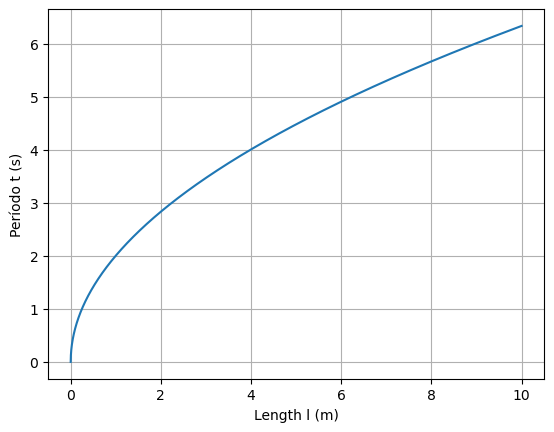

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
g = 9.81  # coeficiente gravítico
length = np.arange(0, 10, 0.001)
period=6.28*np.sqrt(length/g)
plt.plot(length,period)
plt.xlabel('Length l (m)')
plt.ylabel('Período t (s)')
plt.grid();

### Solução estacionária com força de propulsão constante e as derivadas nulas
Para o caso estacionário, a equação diferencial simplifica para:
$$m l^2 \cdot 0 = -m g l \cdot sin(\Theta)- b \cdot 0+l H $$
A solução é:
$$sin(\Theta)=\frac{H}{m g} $$
Ou seja: o ângulo estacionário $\Theta$ só depende da força propulsão $H$ e da massa $m$, e aumenta à medida da percentagem da força de propulsão com o peso $m \cdot g$. 

A notar que neste modelo o ângulo estacionário não depende do comprimento do pêndulo, nem da distribuição da massa.

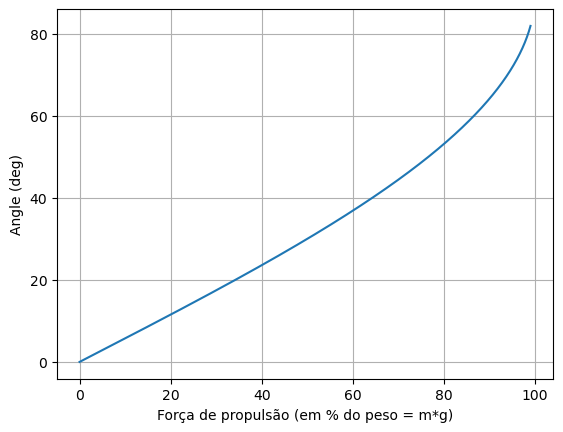

In [179]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#g = 9.81  # coeficiente gravítico em m/s^2
#m = 0.1 #massa em kg
T = np.arange(0, 99, 0.001) # em percentage of m*g
teta=np.arcsin(T/100)
plt.plot(T,teta*180/3.14)
plt.xlabel('Força de propulsão (em % do peso = m*g)')
plt.ylabel('Angle (deg)')
#plt.title('m=0.1 kg')
plt.grid();

Para posterior comparação com a experiência, devemos considerar a possibilidade que o atrito não é tanto uma função da velocidade (é o que a equação diferencial assume), mas antes um atrito entre sólidos. Neste caso, o torque de atrito é constante enquanto em movimento, e corresponde a um coeficiente constante de atrito cujo valor depende dos materiais e da qualidade de superficie, e que depende da força normal na superficie de atrito. 

Assumindo torque de atrito $\tau_a$ constante, alteramos a equação diferencial para o caso estacionário:

$$m l^2 \cdot 0 = -m g l sin(\Theta)- \tau_a+l H $$

A nova solução é:
$$sin(\Theta)=\frac{H-\tau_a/l}{m g} $$

Solução válida enquanto $H \geq \tau_a/l$

O gráfico mostra o impacto de atrito estático.

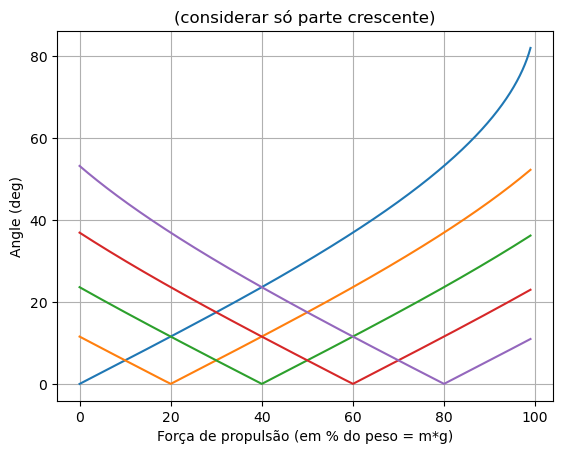

In [246]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#g = 9.81  # coeficiente gravítico em m/s^2
#m = 0.1 #massa em kg
#l=0.5 #comprimento pendulo
T = np.arange(0, 99, 0.001) # em percentage of m*g
tau=np.arange(0, 100,20) # em percentage of m*g*l
teta0=np.arcsin(np.abs(T-tau[0])/100)
teta1=np.arcsin(np.abs(T-tau[1])/100)
teta2=np.arcsin(np.abs(T-tau[2])/100)
teta3=np.arcsin(np.abs(T-tau[3])/100)
teta4=np.arcsin(np.abs(T-tau[4])/100)

plt.plot(T,teta0*180/3.14,label='$tau_a=0$')
plt.plot(T,teta1*180/3.14,label='$tau_a=0.2 mg/l$')
plt.plot(T,teta2*180/3.14,label='$tau_a=0.4 mg/l$')
plt.plot(T,teta3*180/3.14,label='$tau_a=0.6 mg/l$')
plt.plot(T,teta4*180/3.14,label='$tau_a=0.8 mg/l$')

plt.xlabel('Força de propulsão (em % do peso = m*g)')
plt.ylabel('Angle (deg)')
plt.title('(considerar só parte crescente)')
plt.grid();

### Solução com atrito e força de propulsão constante ou variável

A realidade é mais complexa, e é preciso modificar o modelo, para incluir a não-linearidade e o atrito do rolamento, e outros fatores considerados relevantes, como a flutuabilidade e a resistência viscosa do ar, a massa do haste, e em geral a distribuição da massa, a flexibilidade do haste, e outras caracteristicas do suporte mecânico, por exemplo distorção de dimensões.

Seja como for, deve ser definido o modelo teórico e formulada a equação diferencial respetiva.

Equações diferenciais de segunda ordem podem ser resolvidas numéricamente usando a função 'odeint' da biblioteca 'scipy' do Python. 

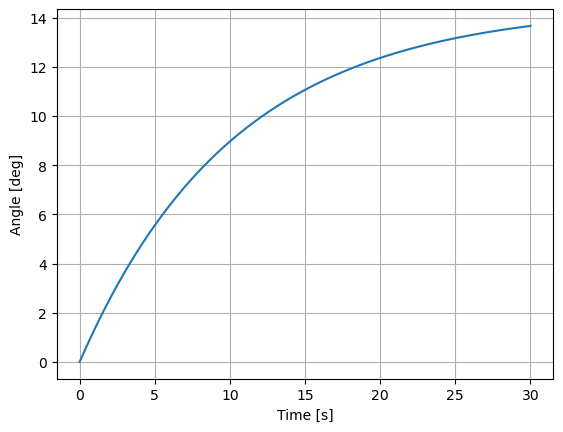

In [238]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

m  = 0.1     # masse (kg)
l   = 0.5   # comprimento (m) T = 6.28*sqrt(l/g)
g = 9.81  # coeficiente gravítico
b=5      #coeficiente de atrito 

time = np.arange(0, 30, 0.001)

# força de propulsão H
def lift(t):
    #return 0
    return m*g/4
    #return 1*np.sin(np.sqrt(g/l)*1.9*t)

def derivatives(x, t):
    # input x = [omega, teta]
    #return [x[1], -g/l*x[0]]  #sem atrito ou propulsão
    #return [x[1], -g/l*x[0]-b/(m*l**2)*x[1] + 1/(m*l)*lift(t)]  #linearizado
    return [x[1], -g/l*np.sin(x[0])-b/(m*l**2)*x[1] + 1/(m*l)*lift(t)]  #nao linear
    #return [x[1], -g/l*np.sin(x[0])-b/(m*l**2) + 1/(m*l)*lift(t)]  #nao linear

# condições iniciais (teta em rad, omega em rad/s)
CI=[0*3.14/180,0]
teta, omega = odeint(derivatives, CI, time).T   

plt.plot(time,teta*180/3.14)
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]')
plt.grid();

#Comparar com soluções analíticas !?

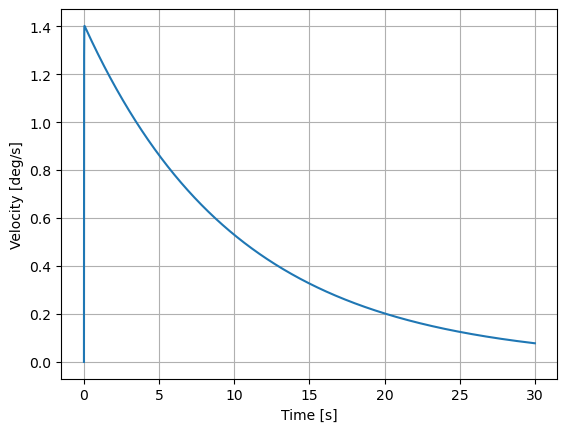

In [241]:
plt.plot(time,omega*180/3.14)
plt.xlabel('Time [s]')
plt.ylabel('Velocity [deg/s]')
plt.grid();

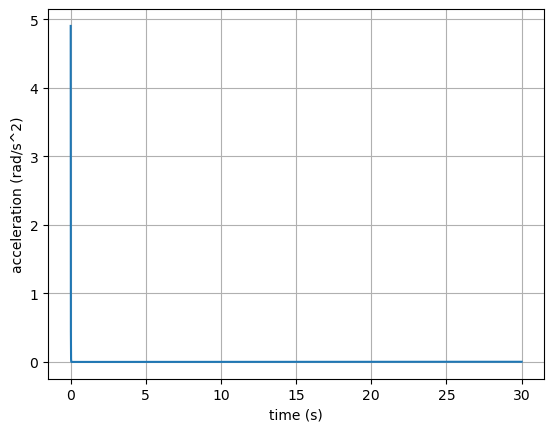

In [240]:
_, alfa = derivatives([teta, omega], time)
plt.plot(time, alfa)
plt.xlabel('time (s)')
plt.ylabel('acceleration (rad/s^2)')
plt.grid(True)
#plt.axis((0, 3, -3, 4));

Sugestão de questões para investigação teórica e experimental
- Investigar variação de parametros: amplitude do movimento, distribuição de masse, movimento do ar, etc.
- o atrito escala mesmo com a magnitude da velocidade ? Não seria melhor um modelo com atrito constante por partes estático/dinâmico entre sólidos ? Como investigar esta hipótese? 
- (outras questões de investigação formuladas pelos estudantes)

Sugestão de variações para investigação teórica e experimental
- Pendulo forçado com propulsão harmónica (resonancia) 